# r book

In [65]:
library(lubridate)
library(tidyverse)
library(ggplot2)
library(dplyr)

In [66]:
#df <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)
df <- read.csv("C:/Users/coleb/OneDrive/Coraline/Resources/csv data/user94403143_workout_history.csv", header=TRUE)

In [67]:
nrow(df)

[1] 719

In [68]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,2022-08-22,2022-08-22,Indoor Run / Jog,414,3.09999,1801,9.6828,9.95841,6.19656,6.02506,144,4599,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6797274268


In [69]:
# df <- separate(data = df, col = Date.Submitted, into = c("left", "middle", "right"), sep = " ")

In [70]:
#write.csv(df, "user94403143_workout_history_clean.csv")

In [71]:
summary(df)

 Date.Submitted     Workout.Date       Activity.Type     
 Length:719         Length:719         Length:719        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
 Calories.Burned..kCal. Distance..mi.    Workout.Time..seconds.
 Min.   :   9.0         Min.   : 0.000   Min.   :   95         
 1st Qu.: 239.0         1st Qu.: 2.008   1st Qu.: 1471         
 Median : 403.0         Median : 3.100   Median : 1800         
 Mean   : 399.1         Mean   : 3.155   Mean   : 2074         
 3rd Qu.: 453.5         3rd Qu.: 3.559   3rd Qu.: 2341         
 Max.   :1928.0         Max.   :13.482   Max.   :11065         
                                                               
 Avg.Pace..min.mi. Max.P

In [72]:
df <- data.frame(df)

In [73]:
nrow(df)

[1] 719

In [74]:
df['duration'] <- df['Workout.Time..seconds.'] / 60

In [75]:
#determine your working library
getwd()

[1] "c:/Users/coleb/OneDrive/Coraline/MapMyRunProjects"

In [76]:
#download your file
#download.file("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", "user94403143_workout_history.csv")

In [77]:
#run_data <- read.csv("user94403143_workout_history.csv", header=TRUE)
run_data <- data.frame(df)

In [78]:
# df %>% mutate(Workout.date = Workout.Date %>% as.Date("%B %d, %Y"), left = month(Workout.Date, abbr = FALSE, label = TRUE))

In [79]:
# #convert the datetime variables using the following logic:
# #%B is a complete month name (November), %e is a day of the month (3) preceded by a space and followed by a comma and a space, and %Y is a four-digit year (2020).
# df$Workout.Date <- as.Date(df$Workout.Date, format = "%B %e, %Y")
# df$Date.Submitted <- as.Date(df$Date.Submitted, format = "%B %e, %Y")

In [80]:
library(lubridate)
#library(tidyverse)

df <- df %>% mutate(Workout.Date=mdy(Workout.Date))
df <- df %>% mutate(Date.Submitted=mdy(Date.Submitted))


Warning message:
"All formats failed to parse. No formats found."
Warning message:
"All formats failed to parse. No formats found."


In [81]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link,duration
,<date>,<date>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,NA,NA,Indoor Run / Jog,414,3.09999,1801,9.6828,9.95841,6.19656,6.02506,144,4599,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6797274268,30.01667


In [82]:
names(run_data)[names(run_data) == "Workout.Date"] <- "Date"
names(run_data)[names(run_data) == "Date.Submitted"] <- "Date.Sub"
names(run_data)[names(run_data) == "Workout.Time..seconds."] <- "Duration"
names(run_data)[names(run_data) == "Distance..mi."] <- "Distance"
names(run_data)[names(run_data) == "minutes"] <- "minutes"
names(run_data)[names(run_data) == "Activity.Type"] <- "Activity"
names(run_data)[names(run_data) == "Avg.Pace..min.mi."] <- "Avg.Pace"
names(run_data)[names(run_data) == "Max.Pace..min.mi."] <- "Max.Pace"
names(run_data)[names(run_data) == "Avg.Speed..mi.h."] <- "Avg.Spd"
names(run_data)[names(run_data) == "Avg.Heart.Rate"] <- "Avg.HR"
names(run_data)[names(run_data) == "Max.Speed..mi.h."] <- "Max.Spd"
names(run_data)[names(run_data) == "Calories.Burned..kCal."] <- "Cal.Burned"
names(run_data)[names(run_data) == "duration"] <- "Minutes"
head(run_data, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Notes,Source,Link,Minutes
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,2022-08-22,2022-08-22,Indoor Run / Jog,414,3.09999,1801,9.6828,9.95841,6.19656,6.02506,144,4599,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6797274268,30.01667
2,2022-08-20,2022-08-20,Run,1544,13.11000,11065,14.0669,7.71115,4.26534,7.78094,140,22531,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6793063441,184.41667


In [83]:
df <- within(run_data, rm('Link', 'Notes', 'Source'))
#df$minutes <- round(df$minutes, digits = 2)

In [84]:
#df$minutes <- as.numeric(as.character(df$minutes))
df <- df %>% mutate_if(is.numeric, round, digits = 2)

In [85]:
library(dplyr); df %>% mutate_if(is.numeric, round, digits=2)

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-08-22,2022-08-22,Indoor Run / Jog,414,3.10,1801,9.68,9.96,6.20,6.03,144,4599,30.02
2022-08-20,2022-08-20,Run,1544,13.11,11065,14.07,7.71,4.27,7.78,140,22531,184.42
2022-08-17,2022-08-17,Indoor Run / Jog,859,6.56,3600,9.15,10.37,6.56,5.79,147,9295,60.00
2022-08-15,2022-08-15,Indoor Run / Jog,632,4.74,3600,12.66,10.42,4.74,5.76,122,8146,60.00
2022-08-14,2022-08-14,Run,618,6.38,4663,12.17,8.82,4.93,6.80,128,11001,77.72
2022-08-12,2022-08-12,Indoor Run / Jog,831,6.21,3617,9.71,9.71,6.18,6.18,144,9306,60.28
2022-08-11,2022-08-11,Run,576,4.63,3712,13.37,1.55,4.49,38.80,116,7878,61.87
2022-08-10,2022-08-10,Run,863,7.02,4441,10.54,0.97,5.69,62.01,144,11520,74.02
2022-08-09,2022-08-09,Run,626,6.35,4274,11.21,1.05,5.35,57.02,145,11074,71.23


In [86]:
df <- df %>% drop_na(Date)
# df <- df %>% drop_na(Date.Sub)

In [87]:
nrow(df)

[1] 719

In [88]:
summary(df)

   Date.Sub             Date             Activity           Cal.Burned    
 Length:719         Length:719         Length:719         Min.   :   9.0  
 Class :character   Class :character   Class :character   1st Qu.: 239.0  
 Mode  :character   Mode  :character   Mode  :character   Median : 403.0  
                                                          Mean   : 399.1  
                                                          3rd Qu.: 453.5  
                                                          Max.   :1928.0  
                                                                          
    Distance         Duration        Avg.Pace          Max.Pace      
 Min.   : 0.000   Min.   :   95   Min.   :  0.000   Min.   :  0.000  
 1st Qu.: 2.010   1st Qu.: 1471   1st Qu.:  9.075   1st Qu.:  0.000  
 Median : 3.100   Median : 1800   Median :  9.740   Median :  0.870  
 Mean   : 3.156   Mean   : 2074   Mean   : 11.441   Mean   :  2.103  
 3rd Qu.: 3.560   3rd Qu.: 2341   3rd Qu.: 11.110 

In [89]:
library(data.table)
#setDT(df)[value==0, value := NA,]
#df[, value := replace(value, is.na(value), mean(value, na.rm = TRUE)) , by = .(year, age)]

In [90]:
HRmedian <- median(df$Avg.HR)
Stepsmedian <- median(df$Steps)

In [91]:
# df[is.na(df)] = 0

In [92]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-08-22,2022-08-22,Indoor Run / Jog,414,3.10,1801,9.68,9.96,6.20,6.03,144,4599,30.02
2,2022-08-20,2022-08-20,Run,1544,13.11,11065,14.07,7.71,4.27,7.78,140,22531,184.42
3,2022-08-17,2022-08-17,Indoor Run / Jog,859,6.56,3600,9.15,10.37,6.56,5.79,147,9295,60.00
4,2022-08-15,2022-08-15,Indoor Run / Jog,632,4.74,3600,12.66,10.42,4.74,5.76,122,8146,60.00


In [93]:
df[is.na(df)] = 0

In [94]:
df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == 0, HRmedian, Avg.HR))
# #df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == NA, HRmean, Avg.HR))
df <- df %>% dplyr::mutate(Steps = ifelse(Steps == 0, Stepsmedian, Steps))
# #df <- df %>% dplyr::mutate(Steps = ifelse(Steps == NA, Stepsmean, Steps))

In [95]:
# df[df == 0] = NA

In [96]:
df$Avg.HR[is.na(df$Avg.HR)] <- median(df$Avg.HR, na.rm = TRUE)
df$Steps[is.na(df$Steps)] <- median(df$Steps, na.rm = TRUE)
df$Max.Pace[is.na(df$Max.Pace)] <- median(df$Max.Pace, na.rm = TRUE)
df$Avg.Pace[is.na(df$Avg.Pace)] <- median(df$Avg.Pace, na.rm = TRUE)
df$Max.Spd[is.na(df$Max.Spd)] <- median(df$Max.Spd, na.rm = TRUE)
df$Avg.Spd[is.na(df$Avg.Spd)] <- median(df$Avg.Spd, na.rm = TRUE)
df$Cal.Burned[is.na(df$Cal.Burned)] <- median(df$Cal.Burned, na.rm = TRUE)

In [97]:
library(lubridate)
df$day <- weekdays(as.Date(df$Date))
df$dayofmonth <- day(as.Date(df$Date))
df$month <- months(as.Date(df$Date))
df$year <- format(as.Date(df$Date, format="%M/%d/%Y"),"%Y")

In [98]:
df <- df %>% mutate(mileage = cut(Distance, breaks=c(0, 3.09, 6.19, 9.99, 13.09, 20), labels=c("Short", "FiveK", "TenK", "TenM", "HalfMar")))

In [99]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes,day,dayofmonth,month,year,mileage
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<fct>
1,2022-08-22,2022-08-22,Indoor Run / Jog,414,3.10,1801,9.68,9.96,6.20,6.03,144,4599,30.02,Monday,22,August,NA,FiveK
2,2022-08-20,2022-08-20,Run,1544,13.11,11065,14.07,7.71,4.27,7.78,140,22531,184.42,Saturday,20,August,NA,HalfMar
3,2022-08-17,2022-08-17,Indoor Run / Jog,859,6.56,3600,9.15,10.37,6.56,5.79,147,9295,60.00,Wednesday,17,August,NA,TenK
4,2022-08-15,2022-08-15,Indoor Run / Jog,632,4.74,3600,12.66,10.42,4.74,5.76,122,8146,60.00,Monday,15,August,NA,FiveK


In [100]:
library(lubridate)
#library(tidyverse)

df <- df %>% mutate(Date=ymd(Date))
df <- df %>% mutate(Date.Sub=ymd(Date.Sub))
#df <- df %>% mutate(Date=mdy(Date))
#df <- df %>% mutate(Date.Sub=mdy(Date.Sub))

In [101]:
df <- df[, c("Date", "Activity", "Duration", "Distance", "Avg.Pace", "Max.Pace", "Avg.Spd", "Cal.Burned", "Avg.HR", "Steps", "mileage")]

In [102]:
df2 = df[sapply(df, is.numeric)]

In [103]:
library(ggplot2)

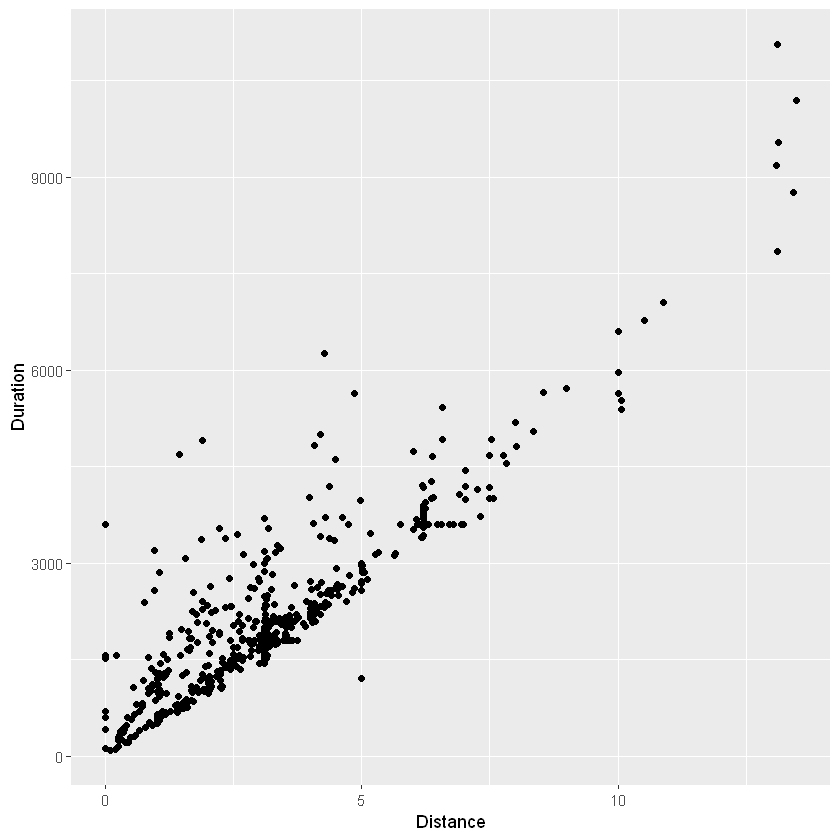

In [104]:
ggplot(data = df2, mapping = aes(x = Distance, y = Duration)) + 
    geom_point()

In [105]:
head(df2)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1801,3.10,9.68,9.96,6.20,414,144,4599
2,11065,13.11,14.07,7.71,4.27,1544,140,22531
3,3600,6.56,9.15,10.37,6.56,859,147,9295
4,3600,4.74,12.66,10.42,4.74,632,122,8146
5,4663,6.38,12.17,8.82,4.93,618,128,11001
6,3617,6.21,9.71,9.71,6.18,831,144,9306


In [106]:
head(df, 1)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2022-08-22,Indoor Run / Jog,1801,3.1,9.68,9.96,6.2,414,144,4599,FiveK


In [107]:
library(dplyr)
library(tidyverse)

In [108]:
df$minutes <- df$Duration / 60
df$minutes <- round(df$minutes, digits = 2)

In [109]:
df3 <- df[order(df$Duration),]
tail(df3, 1)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2,2022-08-20,Run,11065,13.11,14.07,7.71,4.27,1544,140,22531,HalfMar,184.42


In [110]:
#Remove erroneous data (I know I have not run anything over 170 minutes)
#df2 <- df2[df2$minutes < 185,]
df2 <- df2[df2$Avg.Spd < 10,]
df2 <- df2[df2$Cal.Burned < 2000,]
#df2 <- df[df$Date > '2019-01-01',]
df <- df[df$minutes < 185,]
df <- df[df$Avg.Spd < 10,]
df <- df[df$Cal.Burned < 2000,]
#df <- df[df$Date > '2019-01-01',]

In [111]:
nrow(df2)
nrow(df)

[1] 718

[1] 718

In [112]:
head(df, 4)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,2022-08-22,Indoor Run / Jog,1801,3.10,9.68,9.96,6.20,414,144,4599,FiveK,30.02
2,2022-08-20,Run,11065,13.11,14.07,7.71,4.27,1544,140,22531,HalfMar,184.42
3,2022-08-17,Indoor Run / Jog,3600,6.56,9.15,10.37,6.56,859,147,9295,TenK,60.00
4,2022-08-15,Indoor Run / Jog,3600,4.74,12.66,10.42,4.74,632,122,8146,FiveK,60.00


In [113]:
head(df2, 4)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1801,3.10,9.68,9.96,6.20,414,144,4599
2,11065,13.11,14.07,7.71,4.27,1544,140,22531
3,3600,6.56,9.15,10.37,6.56,859,147,9295
4,3600,4.74,12.66,10.42,4.74,632,122,8146


In [114]:
#Create subsets for years 2021 and 2022
df2022 <- df[df$Date >= "2022-01-01",]
df2021 <- subset(df, Date < "2022-01-01" & Date >= "2021-01-01")

In [115]:
library(lubridate)

In [116]:
df$year <- format(df$Date, format = "%Y")
df$year <- as.integer(df$year)

In [117]:
head(df, 4)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,2022-08-22,Indoor Run / Jog,1801,3.10,9.68,9.96,6.20,414,144,4599,FiveK,30.02,2022
2,2022-08-20,Run,11065,13.11,14.07,7.71,4.27,1544,140,22531,HalfMar,184.42,2022
3,2022-08-17,Indoor Run / Jog,3600,6.56,9.15,10.37,6.56,859,147,9295,TenK,60.00,2022
4,2022-08-15,Indoor Run / Jog,3600,4.74,12.66,10.42,4.74,632,122,8146,FiveK,60.00,2022


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



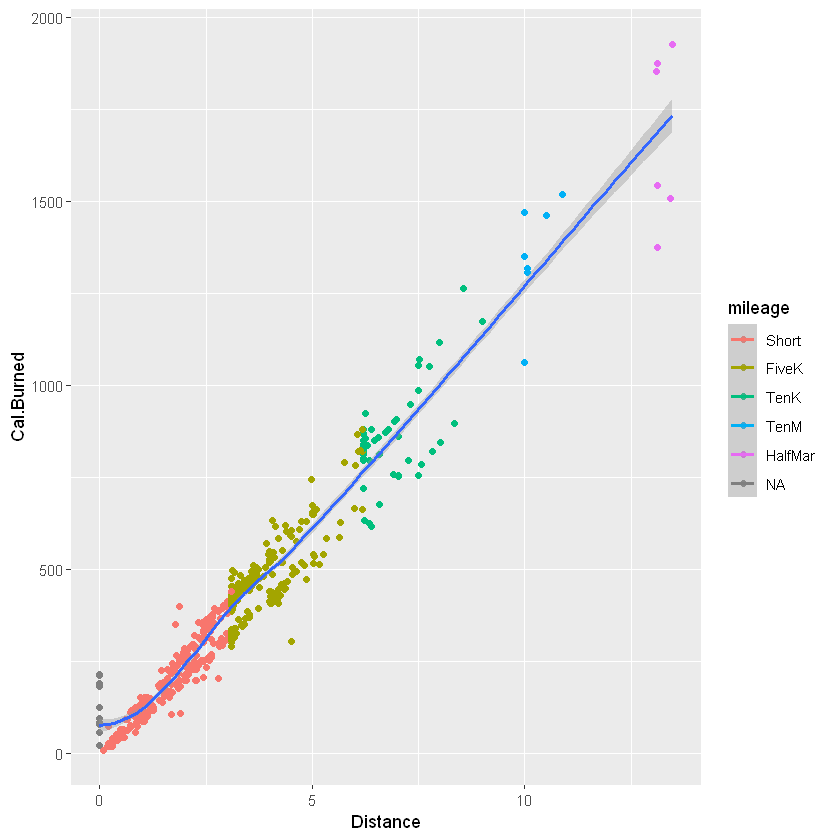

In [118]:
ggplot(data = df, mapping = aes(x = Distance, y = Cal.Burned, color = mileage)) + 
    geom_point() + geom_smooth(aes(color = year))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



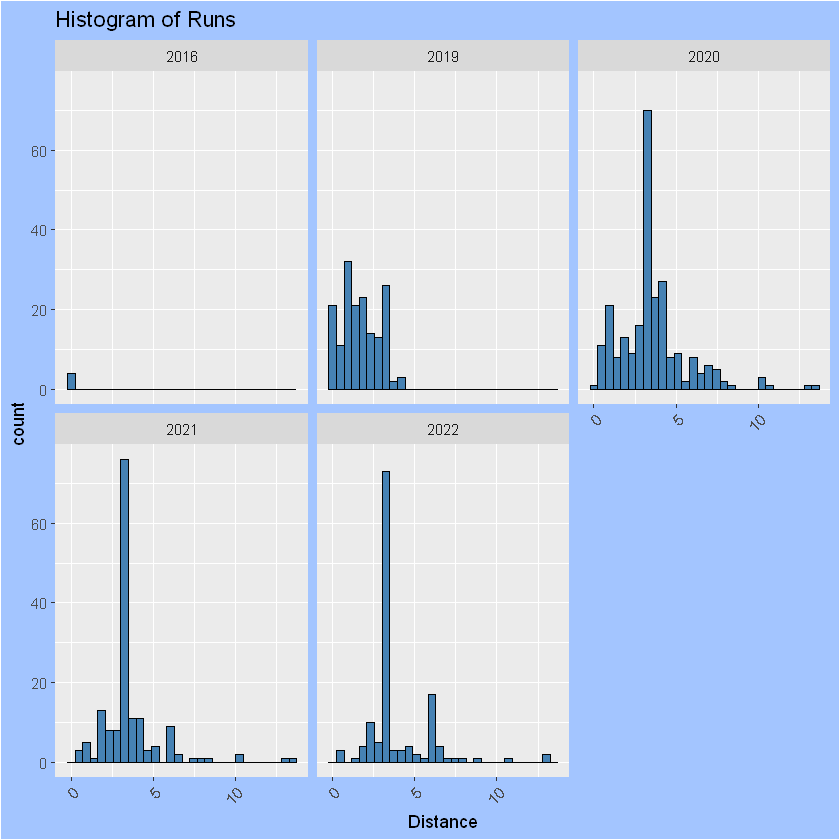

In [119]:
library(ggplot2)
ggplot(data=df, aes(x=Distance)) +
  geom_histogram(fill="steelblue", color="black") +
  ggtitle("Histogram of Runs") +
  facet_wrap(~year) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
  plot.background = element_rect(fill = "#a3c5ff"))

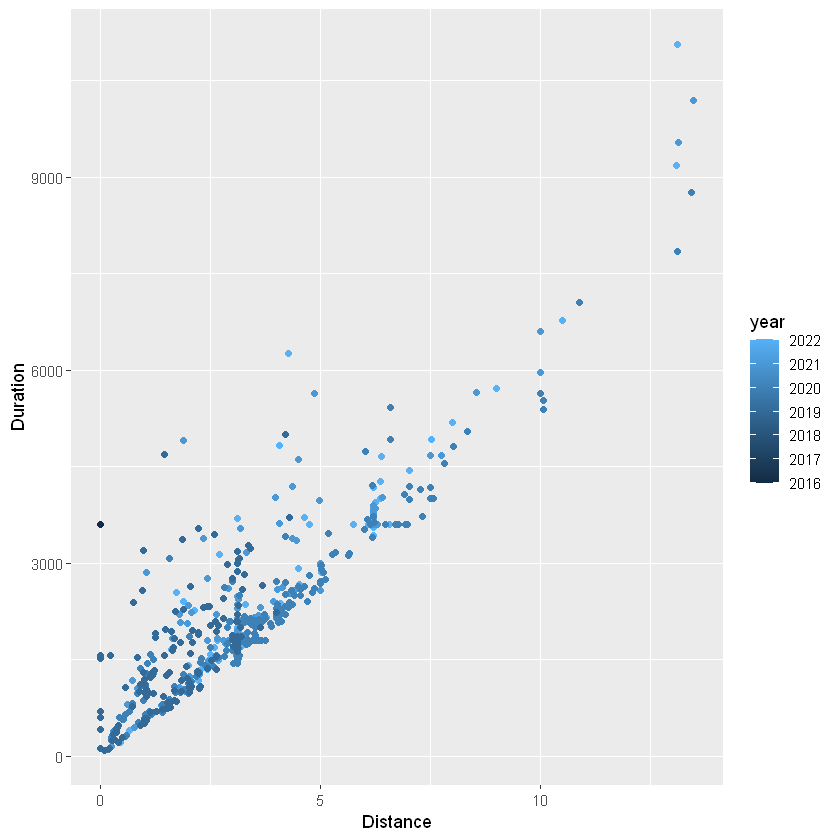

In [120]:
ggplot(data=df, aes(x=Distance, y=Duration, color=year)) + 
  geom_point()

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"


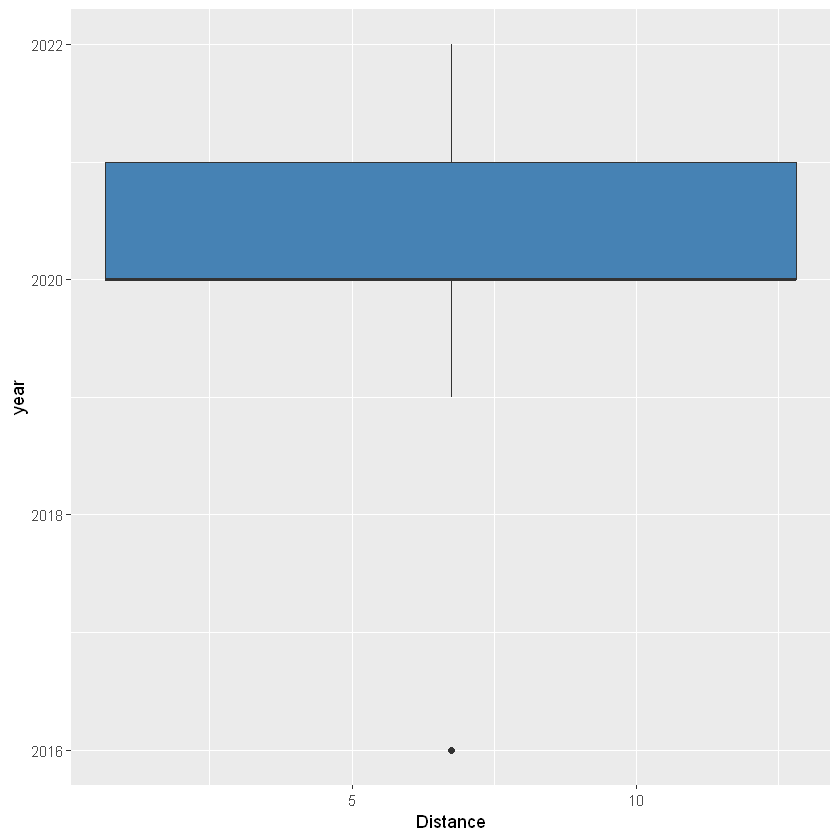

In [121]:
ggplot(data=df, aes(x=Distance, y=year)) + 
  geom_boxplot(fill="steelblue")

In [122]:
# df <- df %>% mutate(new_bin = cut(Distance, breaks=c(0, 3.09, 6.21, 13.09, 15)))


In [123]:
names(df)[names(df) == "new_bin"] <- "Miles"

In [124]:
head(df, 1)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,2022-08-22,Indoor Run / Jog,1801,3.1,9.68,9.96,6.2,414,144,4599,FiveK,30.02,2022


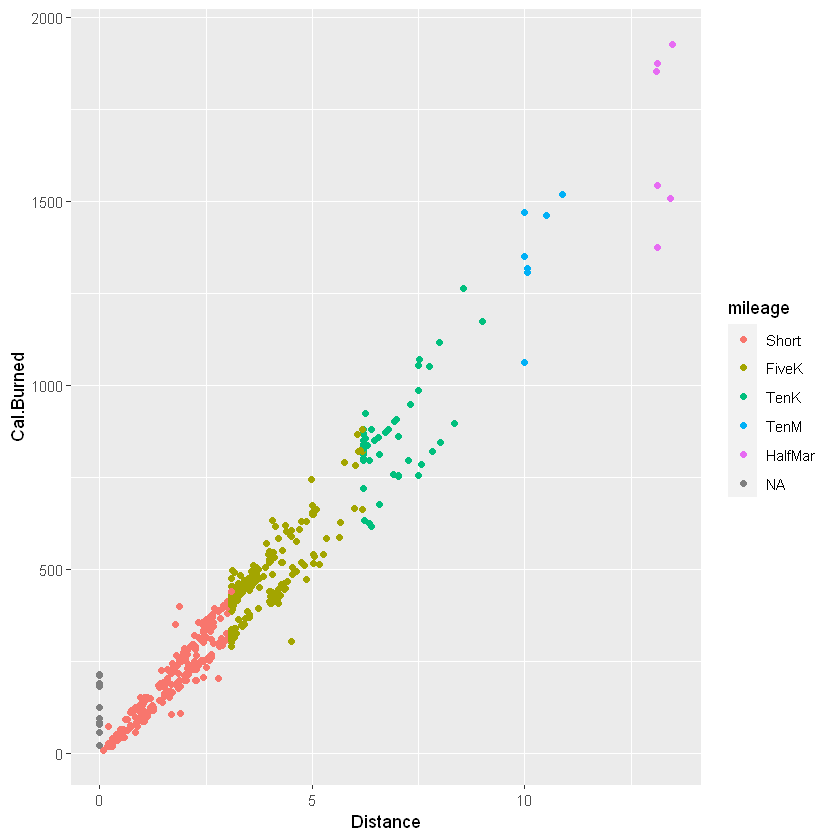

In [125]:
ggplot(data=df, aes(x=Distance, y=Cal.Burned, color=mileage)) + 
  geom_point()

In [126]:
sapply(df, function(x) sum(is.na(x)))
#sapply(df, function(x) sum(duplicated(x)))

Date   Activity   Duration   Distance   Avg.Pace   Max.Pace    Avg.Spd 
         0          0          0          0          0          0          0 
Cal.Burned     Avg.HR      Steps    mileage    minutes       year 
         0          0          0         22          0          0

In [127]:
head(df, 4)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,2022-08-22,Indoor Run / Jog,1801,3.10,9.68,9.96,6.20,414,144,4599,FiveK,30.02,2022
2,2022-08-20,Run,11065,13.11,14.07,7.71,4.27,1544,140,22531,HalfMar,184.42,2022
3,2022-08-17,Indoor Run / Jog,3600,6.56,9.15,10.37,6.56,859,147,9295,TenK,60.00,2022
4,2022-08-15,Indoor Run / Jog,3600,4.74,12.66,10.42,4.74,632,122,8146,FiveK,60.00,2022


In [128]:
nrow(df)

[1] 718

## Update my Google Data Studio Data File

In [134]:
#install.packages("reticulate")
library(reticulate)
#use_python("C:/ProgramData/Anaconda3/python.exe")
use_python("C:/users/coleb/mambaforge/python.exe")
py_run_file("C:/Users/coleb/OneDrive/Coraline/MapMyRunProjects/csv to Google Sheets py script.py")

In [413]:
# df4 <- googlesheets4::read_sheet("https://docs.google.com/spreadsheets/d/19EApq3X76jXNkxdsE3EEF2xvjBzS7RMxeMZAhniHCds/edit?usp=sharing")

## Amazon Halo Data

In [414]:
hdf <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/Activity_Workouts_1970-01-01--2022-07-15_637a6b45-761f-4361-b9e9-13651fb7ee20.csv")

In [415]:
head(hdf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Software.OS,Software.OS.Version,Active.Time..ms.,Total.Duration..ms.,Activity.Pause,Session.Source
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2022-07-20T20:01:25.436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,ios,15.6,3822108,3822108,Not Applicable,User Logged
2,2022-07-18T16:20:58.102Z,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,1.0.118889,ios,15.6,657321,657321,Not Applicable,User Logged


In [416]:
cadf <- within(hdf, rm('Activity.Pause', 'Session.Source', 'Software.OS.Version', 'Software.OS'))

In [417]:
head(cadf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-20T20:01:25.436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108
2,2022-07-18T16:20:58.102Z,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,1.0.118889,657321,657321


### Test Split Date

In [418]:
dtparts <- t(as.data.frame(str_split(cadf$Start.Time, "T")))

In [419]:
row.names(dtparts) = NULL

In [420]:
install.packages("chron")
library(chron)

Warning message:
"package 'chron' is in use and will not be installed"


In [421]:
dates = dtparts[,1]
times = dtparts[,2]

In [422]:
dates <- as.Date(dates)
dates <- as.data.frame(dates)


In [423]:
names(dates)[names(dates) == "dates"] <- "Date"

In [424]:
cadf <- as.data.frame(cadf)

In [425]:
merge(cadf, dates)

Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<date>
2022-07-20T20:01:25.436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108,2022-07-20
2022-07-18T16:20:58.102Z,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,1.0.118889,657321,657321,2022-07-20
2022-07-18T15:49:05.877Z,2022-07-18T16:00:03.144Z,WORKOUT,WALKING,Automatic,-6,0.4977225,No Data,No Data,110,98,733,80,1.0.118889,657267,657267,2022-07-20
2022-07-18T15:22:12.198Z,2022-07-18T15:34:09.457Z,WORKOUT,WALKING,Automatic,-6,1.35,No Data,60000.0,111,95,743,82,1.0.118889,717259,717259,2022-07-20
2022-07-18T11:29:11.486Z,2022-07-18T13:11:43.104Z,WORKOUT,RUNNING,Automatic,-6,191.76713333333333,5568514.0,360000.0,162,141,15064,1535,1.0.118889,6151618,6151618,2022-07-20
2022-07-18T00:20:44.568Z,2022-07-18T00:54:35.062Z,WORKOUT,RUNNING,Automatic,-6,57.01286,1560000.0,300000.0,175,141,4463,496,1.0.118889,2030494,2030494,2022-07-20
2022-07-16T18:57:19.226Z,2022-07-16T19:31:10.404Z,WORKOUT,RUNNING,Automatic,-6,58.679566666666666,1680000.0,160774.0,148,130,4521,445,1.0.118889,2031178,2031178,2022-07-20
2022-07-15T22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000,2022-07-20
2022-07-14T12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,2450749,2450749,2022-07-20


In [426]:
#cadf %>% separate(Start.Time, c(Date, Time), "T")

### Better date split option

In [427]:
library(dplyr)
library(tidyr)
cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [428]:
head(cadf, 2)

,Date,Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-20,20:01:25.436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108
2,2022-07-18,16:20:58.102Z,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,1.0.118889,657321,657321


In [429]:
cadf <- cadf %>% mutate(Date = as.Date(Date))

In [430]:
# mymerge <- merge(cadf, df, by = c("Date"))

In [431]:
library(stringr)
library(tidyr)
cadf <- separate(cadf, Time, c('Times', 'Ms'), "[.]")

In [432]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-20,20:01:25,436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108


In [433]:
cadf$DTS <- with(cadf, ymd(Date) + hms(Times))

In [434]:
library("lubridate")
hours <- -3600 * cadf$Local.Time.Zone.Offset
cadf$my_date_time1 <- cadf$DTS + (-3600 * cadf$Local.Time.Zone.Offset)

In [435]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,my_date_time1
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>
1,2022-07-20,20:01:25,436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108,2022-07-20 20:01:25,2022-07-21 02:01:25


In [436]:
cadf <- separate(cadf, my_date_time1, c('Date 2', 'Time 2'), " ")

In [437]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,...,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2,Time 2
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>
1,2022-07-20,20:01:25,436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,...,171,153,9664,1068,1.0.118889,3822108,3822108,2022-07-20 20:01:25,2022-07-21,02:01:25


In [438]:
cadf <- within(cadf, rm('Date', 'Time 2', 'Software.Version', 'Ms'))

In [439]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
1,20:01:25,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,3822108,3822108,2022-07-20 20:01:25,2022-07-21
2,16:20:58,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,657321,657321,2022-07-18 16:20:58,2022-07-18


In [440]:
names(cadf)[17] <- 'Date'

In [441]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Active.Time..ms.,Total.Duration..ms.,DTS,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
1,20:01:25,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,3822108,3822108,2022-07-20 20:01:25,2022-07-21
2,16:20:58,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,657321,657321,2022-07-18 16:20:58,2022-07-18


In [442]:
df$Date <- as.Date(df$Date)
cadf$Date <- as.Date(cadf$Date)

In [443]:
head(df, 2)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,2022-08-20,Run,11065,13.11,14.07,7.71,4.27,1544,140,22531,HalfMar,184.42,2022
2,2022-08-17,Indoor Run / Jog,3600,6.56,9.15,10.37,6.56,859,147,9295,TenK,60.00,2022


In [444]:
cadf2 <- filter(cadf, Session.Subtype == 'RUNNING')

In [445]:
mymerge <-merge(x=cadf2,y=df,by='Date')

In [446]:
length(mymerge)
length(cadf2)
length(df)
nrow(mymerge)
nrow(cadf2)
nrow(df)

[1] 29

[1] 17

[1] 13

[1] 151

[1] 159

[1] 718

In [447]:
mymerge <- mymerge[order(mymerge$Date),]

In [448]:
mymerge$year <- format(mymerge$Date, format = "%Y")

In [449]:
head(mymerge, 2)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,...,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps.y,mileage,minutes,year
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
1,2021-09-23,12:18:41,2021-09-23T12:59:29.798Z,WORKOUT,RUNNING,Automatic,-5,76.51169,2160000.0,269798.0,...,3.56,10.04,2.40,5.98,469,146,5720,FiveK,35.72,2021
2,2021-09-24,12:30:07,2021-09-24T13:13:14.739Z,WORKOUT,RUNNING,Automatic,-5,76.28969833333333,2040000.0,494739.0,...,3.56,9.44,4.25,6.36,494,161,5340,FiveK,33.58,2021


## EDA with my merged data set

In [450]:
mm22 <- mymerge %>% select(c("Distance", "Duration", "Activity.Score", "Steps.y", "Avg.HR", "Avg.Spd", "Cal.Burned"))

In [451]:
mm22 <- transform(mm22,
                             Activity.Score = as.numeric(Activity.Score))

In [452]:
mm22 <- mm22 %>%

  filter(!duplicated(cbind(Distance,  Duration, Cal.Burned)))

In [453]:
head(mm22, 20)

,Distance,Duration,Activity.Score,Steps.y,Avg.HR,Avg.Spd,Cal.Burned
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.56,2143,76.51169,5720,146,5.98,469
2,3.56,2015,76.28970,5340,161,6.36,494
3,4.00,2164,72.41923,5790,149,6.65,521
4,4.00,2135,72.90169,5720,149,6.74,520
5,3.57,2012,72.83316,5405,150,6.38,457
6,4.40,2573,94.71112,6816,153,6.16,603
7,3.10,1581,57.62157,4257,149,7.06,402
8,3.10,1557,55.09420,4200,149,7.17,400
9,3.10,1800,57.93465,4796,148,6.21,403


## Plot EDA

In [454]:
df2 = df[sapply(df, is.numeric)]

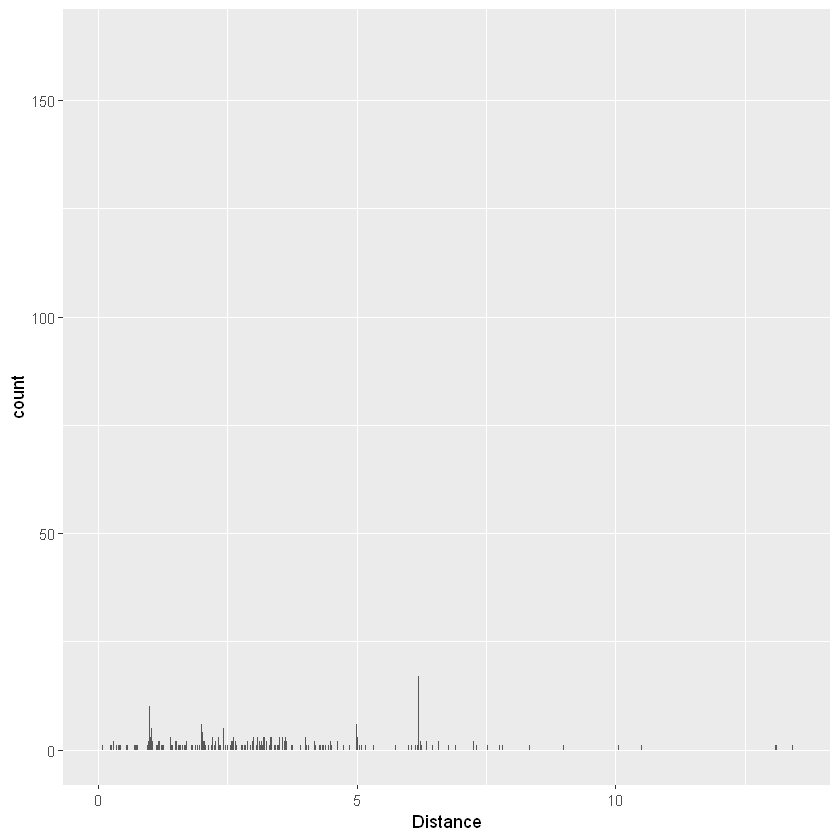

In [455]:
ggplot(data = df2) +
  geom_bar(mapping = aes(x = Distance))

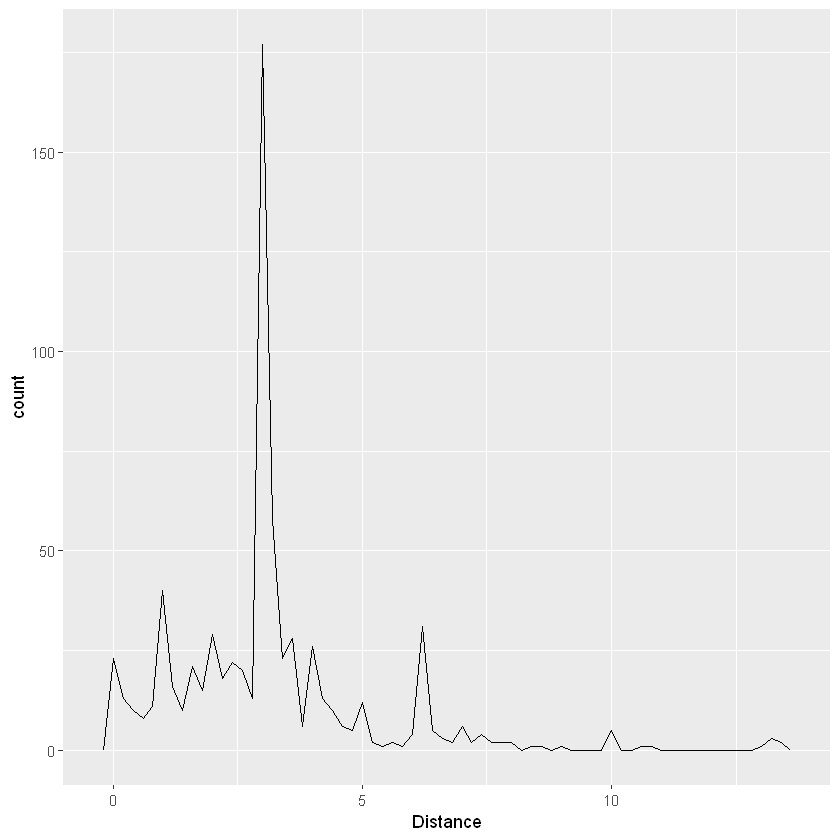

In [456]:
ggplot(data = df2, mapping = aes(x = Distance, colour = Duration)) +
  geom_freqpoly(binwidth = 0.2)

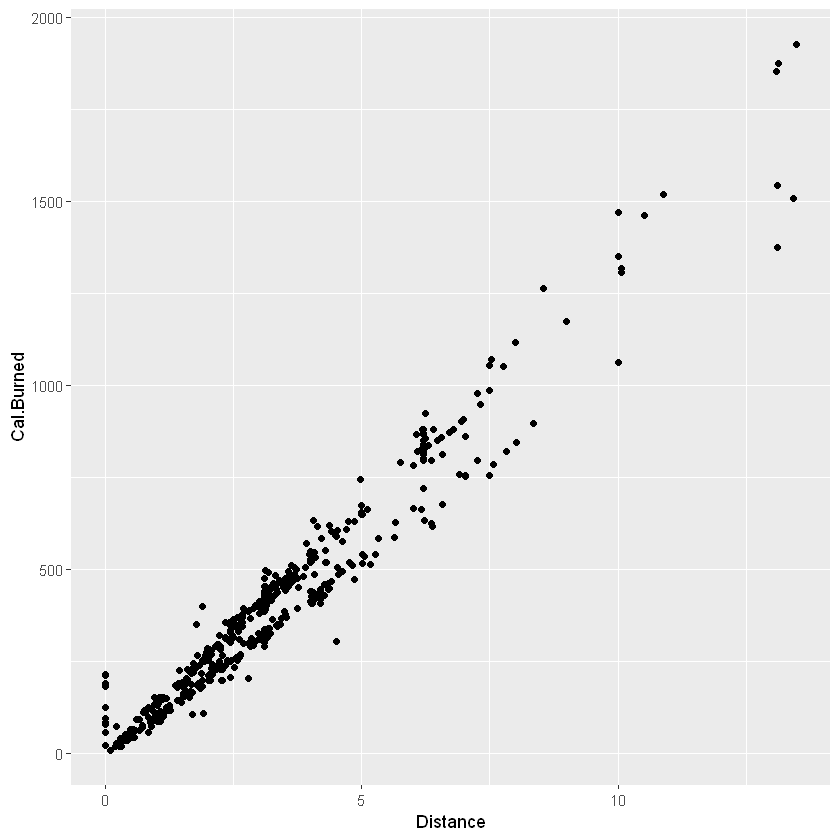

In [457]:
ggplot(data = df2, mapping = aes(x = Distance, y = Cal.Burned)) + 
  geom_point()

In [458]:
cormat <- round(cor(df2),2)
head(cormat)


,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
Duration,1.00,0.88,0.09,-0.04,-0.03,0.87,0.01,0.36,1.00,0.21
Distance,0.88,1.00,-0.16,-0.09,0.37,0.97,0.21,0.38,0.88,0.35
Avg.Pace,0.09,-0.16,1.00,0.09,-0.42,-0.18,-0.33,-0.06,0.09,-0.08
Max.Pace,-0.04,-0.09,0.09,1.00,-0.15,-0.10,-0.06,-0.04,-0.04,-0.09
Avg.Spd,-0.03,0.37,-0.42,-0.15,1.00,0.32,0.41,0.06,-0.03,0.34
Cal.Burned,0.87,0.97,-0.18,-0.10,0.32,1.00,0.24,0.38,0.87,0.38


In [459]:
install.packages("reshape2")
library(reshape2)
melted_cormat <- melt(cormat)
head(melted_cormat)

Warning message:
"package 'reshape2' is in use and will not be installed"


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Duration,Duration,1.00
2,Distance,Duration,0.88
3,Avg.Pace,Duration,0.09
4,Max.Pace,Duration,-0.04
5,Avg.Spd,Duration,-0.03
6,Cal.Burned,Duration,0.87


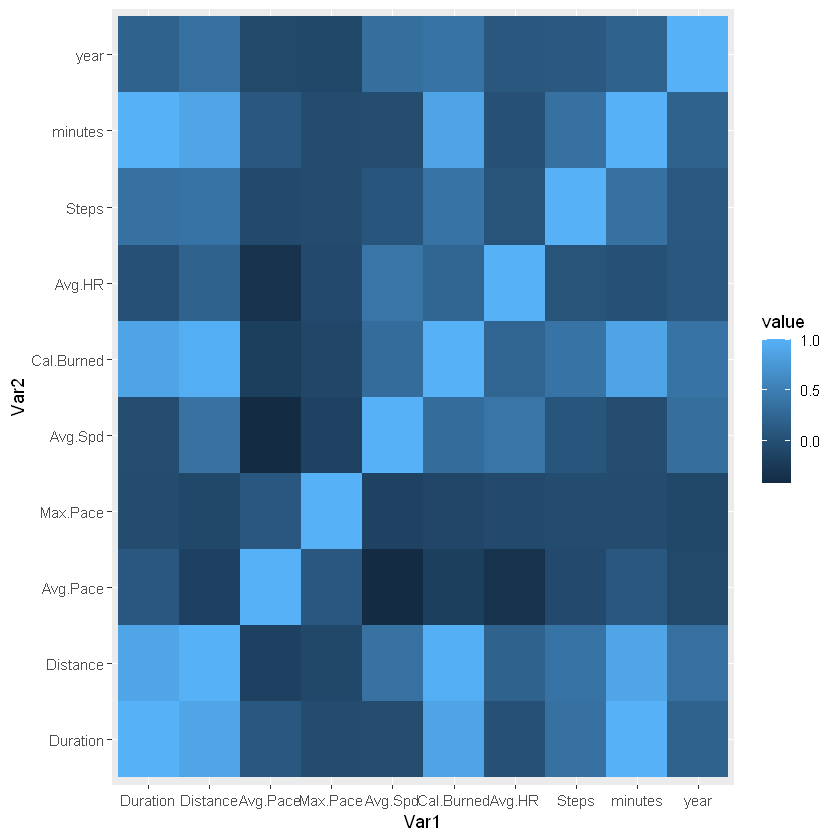

In [460]:
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()

In [461]:
linear_model <- lm(minutes ~ Distance, data = df2)

In [462]:
summary(linear_model)


Call:
lm(formula = minutes ~ Distance, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.502  -5.619  -3.729   1.633  59.683 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.1379     0.7233   7.103 2.95e-12 ***
Distance      9.3393     0.1930  48.392  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.43 on 716 degrees of freedom
Multiple R-squared:  0.7658,	Adjusted R-squared:  0.7655 
F-statistic:  2342 on 1 and 716 DF,  p-value: < 2.2e-16


In [463]:
#Calories burned during a run (15 miles = 1, 20 miles = 2, etc.)

new_distance <- data.frame(
    Distance = c(15, 20, 26.2)   
)

pred <- predict(linear_model, new_distance, interval = "confidence")
pred

,fit,lwr,upr
1,145.2280,140.6766,149.7793
2,191.9246,185.4978,198.3514
3,249.8285,241.0647,258.5923


In [464]:
halftimes <- df2[df2$Distance > 13.09,]
#halftimes2 <- mm23[mm23$Distance > 13.09,]


In [465]:
head(halftimes, 20)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,11065,13.11,14.07,7.71,4.27,1544,140,22531,184.42,2022
98,9189,13.10,11.69,0.68,5.13,1854,156,22087,153.15,2022
151,9540,13.13,12.11,1.35,4.96,1876,148,22488,159.00,2021
268,10191,13.48,12.60,0.48,4.76,1928,144,22719,169.85,2021
423,8767,13.43,10.87,0.13,5.52,1508,145,23604,146.12,2020
469,7844,13.12,9.96,1.10,6.02,1377,150,21427,130.73,2020


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



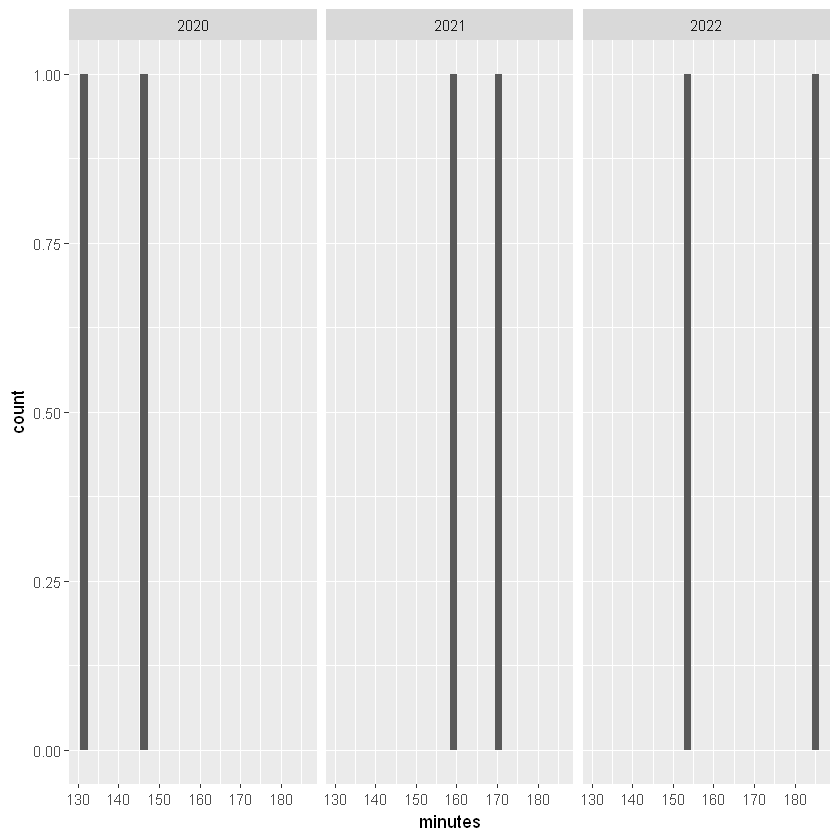

In [466]:
ggplot(halftimes, aes(x=minutes)) + 
  geom_histogram() + 
  facet_wrap(~year)

In [467]:
df3 <- df2 %>%

  filter(!duplicated(cbind(Distance,  Duration, Cal.Burned)))

In [468]:
head(df3, 20)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,11065,13.11,14.07,7.71,4.27,1544,140,22531,184.42,2022
2,3600,6.56,9.15,10.37,6.56,859,147,9295,60.00,2022
3,3600,4.74,12.66,10.42,4.74,632,122,8146,60.00,2022
4,4663,6.38,12.17,8.82,4.93,618,128,11001,77.72,2022
5,3617,6.21,9.71,9.71,6.18,831,144,9306,60.28,2022
6,3712,4.63,13.37,1.55,4.49,576,116,7878,61.87,2022
7,4441,7.02,10.54,0.97,5.69,863,144,11520,74.02,2022
8,4274,6.35,11.21,1.05,5.35,626,145,11074,71.23,2022
9,4013,6.35,10.53,0.50,5.70,797,146,10360,66.88,2022


In [469]:
linear_model$coefficients

(Intercept)    Distance 
   5.137937    9.339335

In [470]:
mlr <- lm(Distance ~ minutes + Avg.Spd, data = df2)

In [471]:
summary(mlr)


Call:
lm(formula = Distance ~ minutes + Avg.Spd, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2289 -0.1440 -0.0147  0.1816  2.2371 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.4037005  0.0790242  -30.42   <2e-16 ***
minutes      0.0832989  0.0009508   87.61   <2e-16 ***
Avg.Spd      0.4858703  0.0122929   39.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5481 on 715 degrees of freedom
Multiple R-squared:  0.9265,	Adjusted R-squared:  0.9263 
F-statistic:  4505 on 2 and 715 DF,  p-value: < 2.2e-16


In [472]:
mlr$coefficients

(Intercept)     minutes     Avg.Spd 
-2.40370054  0.08329889  0.48587028

In [473]:
install.packages('mgcv')
library(mgcv)

Warning message:
"package 'mgcv' is in use and will not be installed"


`geom_smooth()` using formula 'y ~ x'



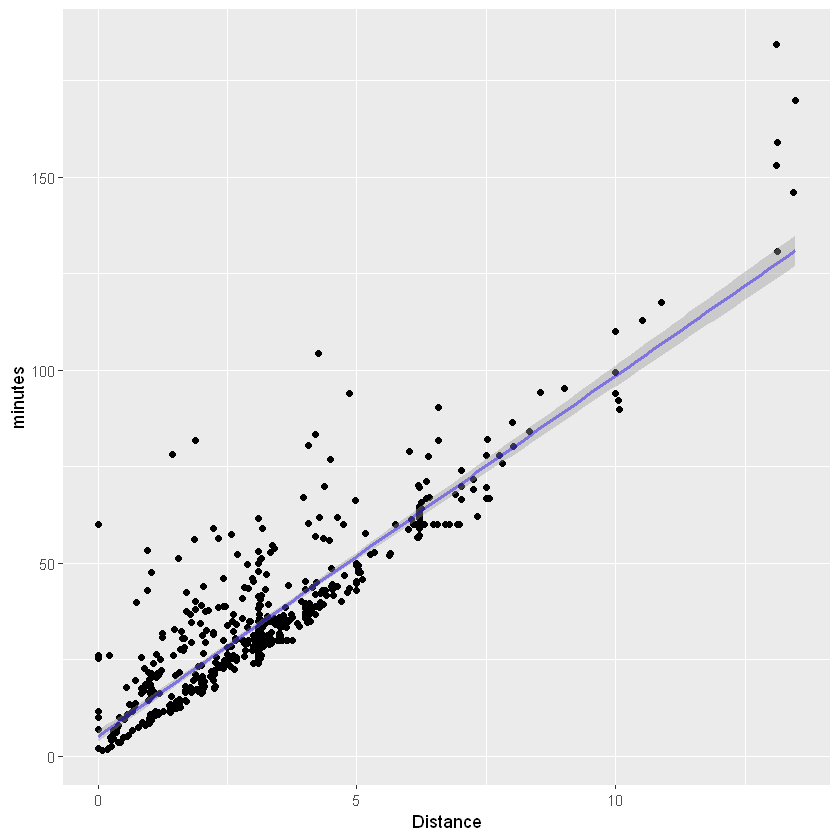

In [474]:
ggplot(df2, aes(x = Distance, y = minutes)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "#1900fa6e")

In [475]:
# score_model <- lm(duration ~ Distance, data = mm22)
# mm22$predicted_duration <- predict(score_model, mm22$Distance, interval = "confidence")

# ggplot(mm22, aes(x = duration, y = Distance)) +
#   geom_smooth(method = "lm", se = FALSE, color = "red") +  # Plot regression slope
#   geom_segment(aes(xend = duration, yend = predicted_duration), alpha = .2) +  # alpha to fade lines
#   geom_point() +
#   geom_point(aes(y = predicted_duration), shape = 1) +
#   theme_bw()  # Add theme for cleaner look

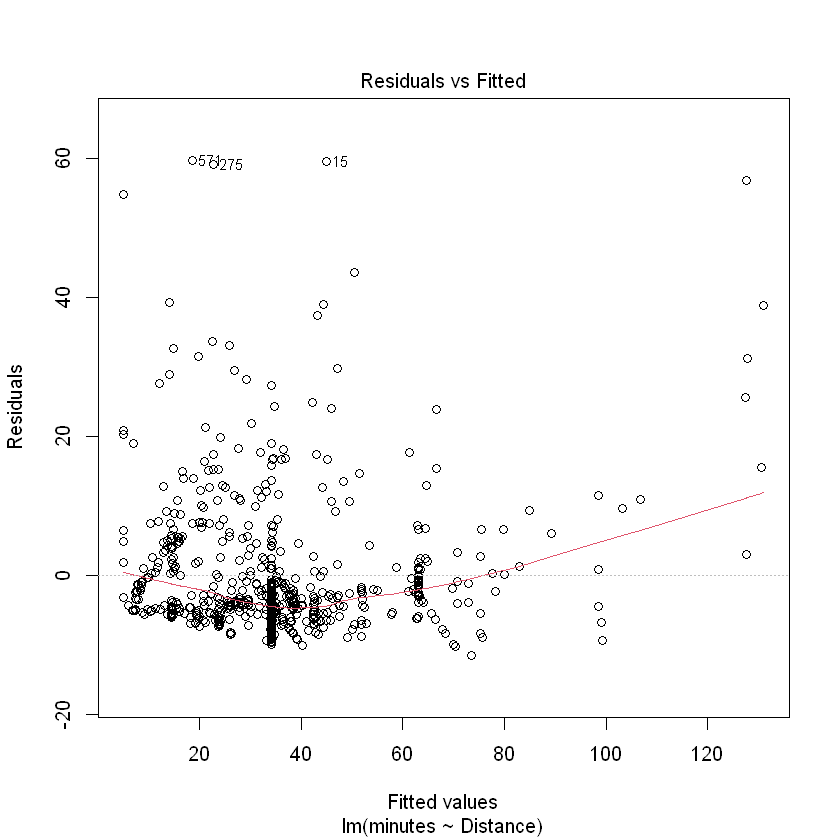

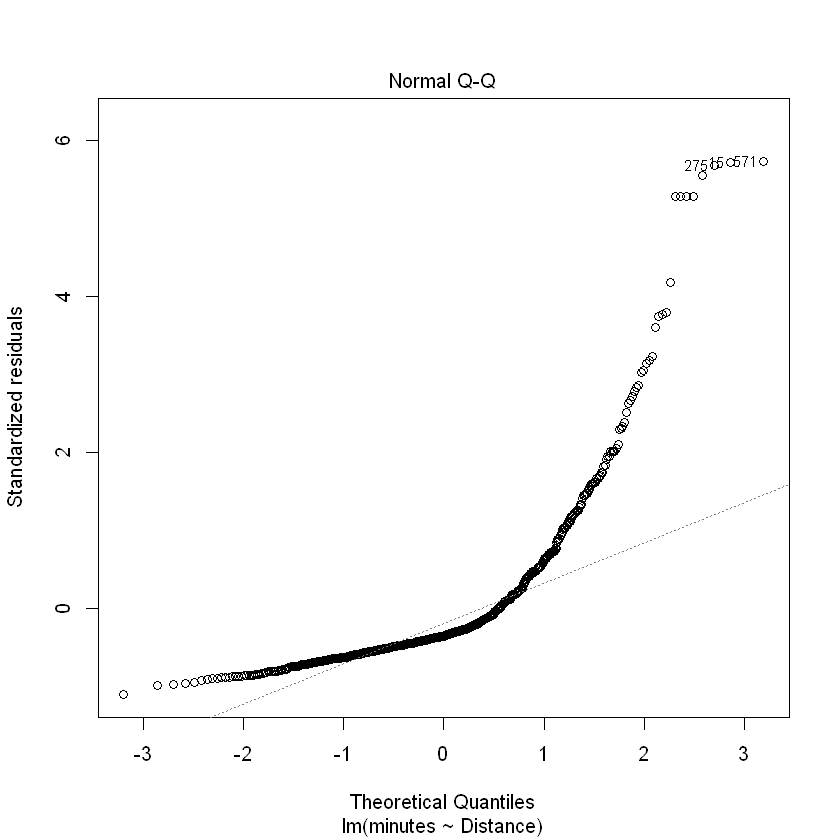

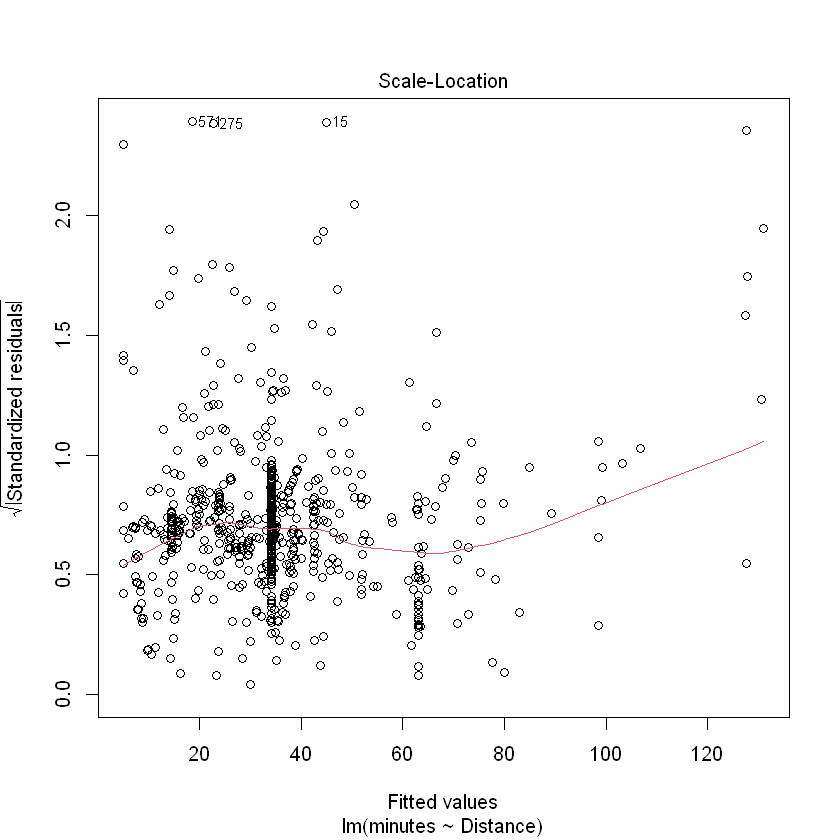

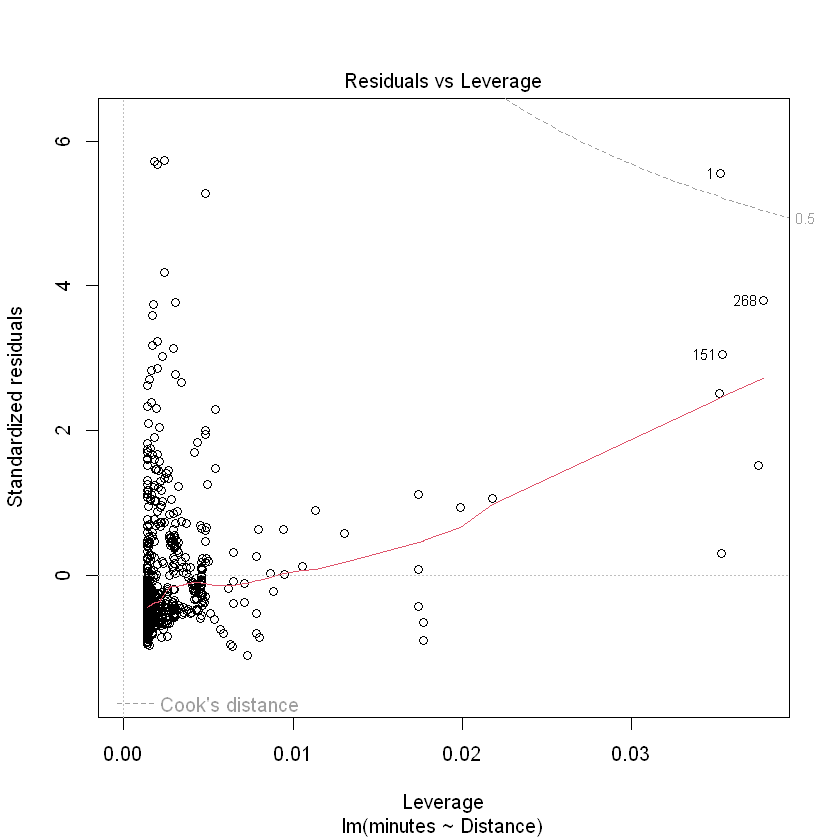

In [476]:
linear_model <- lm(minutes ~ Distance, data = df2)
plot(linear_model)

## Extra

In [477]:
set.seed(20)
x <- seq(from=0, to=20, by=0.1)

# value to predict (y):
y <- 500 + 0.4 * (x-10)^3

# some noise is generated and added to the real signal (y):
noise <- rnorm(length(x), mean=10, sd=80)
noisy.y <- y + noise

`geom_smooth()` using formula 'y ~ x'



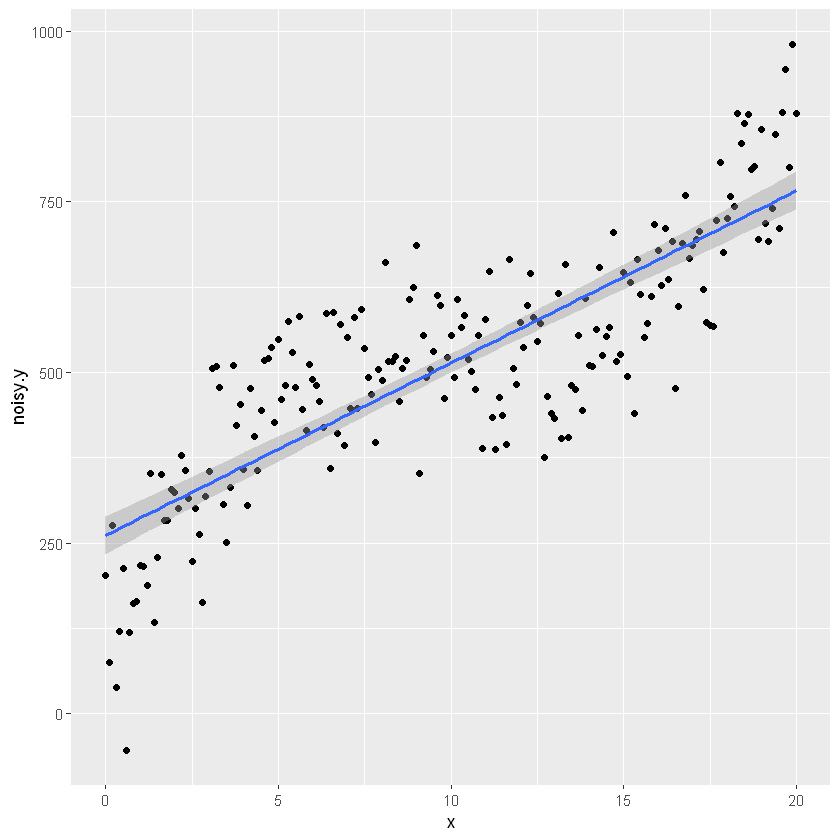

In [478]:
# fit linear model
ggplot(data=NULL,aes(x, noisy.y)) + 
    geom_point() + 
    geom_smooth(method = "lm")

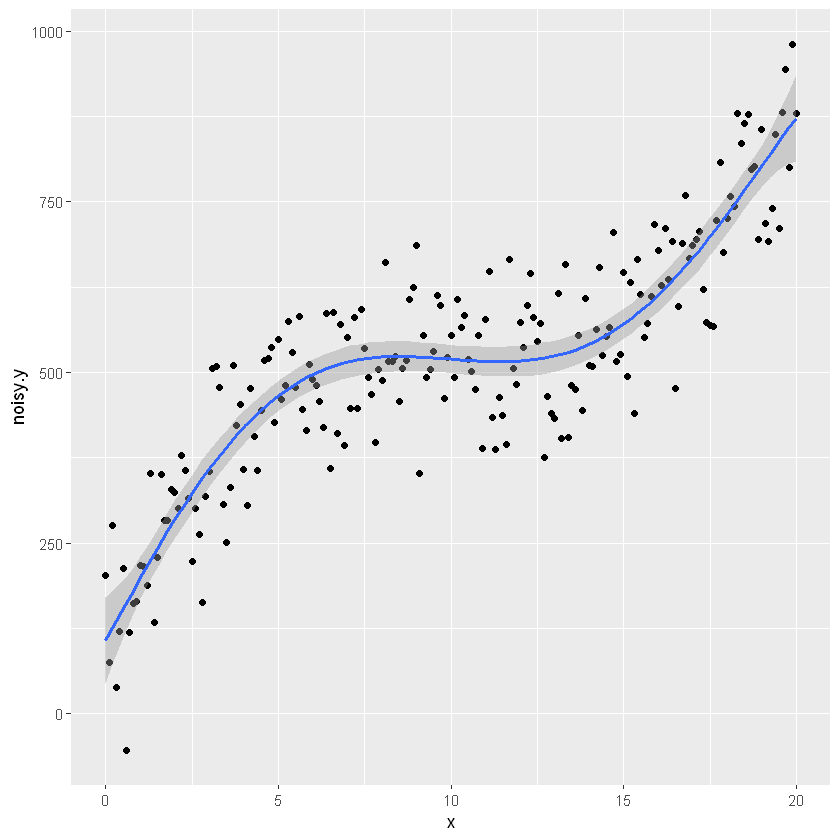

In [479]:
ggplot(data=NULL,aes(x, noisy.y)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 5))

## Linear Model & Multiple Linear Model

In [480]:
linear_model <- lm(Duration ~ Distance, df2)

In [481]:
mse <- mean(linear_model$residuals^2)
mse

[1] 390640.2

In [482]:
rmse <- sqrt(mse)
rmse

[1] 625.0121

In [483]:
summary(linear_model)$r.squared

[1] 0.7658473

In [484]:
head(df2, 2)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,11065,13.11,14.07,7.71,4.27,1544,140,22531,184.42,2022
2,3600,6.56,9.15,10.37,6.56,859,147,9295,60.00,2022


In [485]:
mlr <- lm(Distance ~ minutes + Cal.Burned, data = df2)

In [486]:
mse_mlr <- mean(mlr$residuals^2)
mse_mlr

[1] 0.2030792

In [487]:
rmse_mlr <- sqrt(mse_mlr)
rmse_mlr

[1] 0.4506431

In [488]:
summary(mlr)$r.squared

[1] 0.9500908

In [489]:
# head(predict(score_model))

In [490]:
#install.packages("rlang")
#install.packages("tidymodels")
#install.packages('devtools')
#install.packages('Rtools')
#devtools::install_github("r-lib/rlang", build_vignettes = TRUE)

In [491]:
# # Library for modeling
# library(tidymodels)

# # Load tidyverse
# library(tidyverse)

In [492]:
head(mymerge)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,...,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps.y,mileage,minutes,year
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
1,2021-09-23,12:18:41,2021-09-23T12:59:29.798Z,WORKOUT,RUNNING,Automatic,-5,76.51169,2160000.0,269798.0,...,3.56,10.04,2.40,5.98,469,146,5720,FiveK,35.72,2021
2,2021-09-24,12:30:07,2021-09-24T13:13:14.739Z,WORKOUT,RUNNING,Automatic,-5,76.28969833333333,2040000.0,494739.0,...,3.56,9.44,4.25,6.36,494,161,5340,FiveK,33.58,2021
3,2021-09-25,16:42:43,2021-09-25T17:20:33.052Z,WORKOUT,RUNNING,Automatic,-5,72.41923333333332,2133052.0,76050.0,...,4.00,9.02,0.00,6.65,521,149,5790,FiveK,36.07,2021
4,2021-09-26,15:24:57,2021-09-26T16:03:50.992Z,WORKOUT,RUNNING,Automatic,-5,72.90168750000001,2100000.0,170992.0,...,4.00,8.90,0.00,6.74,520,149,5720,FiveK,35.58,2021
5,2021-09-27,12:19:08,2021-09-27T12:58:47.413Z,WORKOUT,RUNNING,Automatic,-5,72.83315583333334,2040000.0,287413.0,...,3.57,9.40,0.96,6.38,457,150,5405,FiveK,33.53,2021
6,2021-09-28,10:05:11,2021-09-28T10:56:40.224Z,WORKOUT,RUNNING,Automatic,-5,94.7111225,2640000.0,400224.0,...,4.40,9.74,0.90,6.16,603,153,6816,FiveK,42.88,2021


In [493]:
smmg <- mymerge %>% select(c(Distance, Duration, Activity.Score, Avg.HR, Steps.y))

In [494]:
head(smmg)

,Distance,Duration,Activity.Score,Avg.HR,Steps.y
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,3.56,2143,76.51169,146,5720
2,3.56,2015,76.28969833333333,161,5340
3,4.00,2164,72.41923333333332,149,5790
4,4.00,2135,72.90168750000001,149,5720
5,3.57,2012,72.83315583333334,150,5405
6,4.40,2573,94.7111225,153,6816


In [495]:
# set.seed(1234)
# flight_split <- initial_split(smmg)
# train_data <- training(flight_split)
# test_data <- testing(flight_split)

In [496]:
# library(tidyverse)
# # Pick linear regression
# lm_spec <- linear_reg() %>%
#   # Set engine
#   set_engine(engine = "lm")

# # Print the linear function
# lm_spec

## Extra

In [497]:
# test <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [498]:
# library(dplyr)
# library(tidyr)
# cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [499]:
# cadf <- cadf %>% mutate(Date = as.Date(Date))

In [500]:
# names(test)[names(test) == "Workout.Date"] <- "Date"


In [501]:
# test$Workout.Date <- as.Date(test$Workout.Date, format = "%B %e, %Y")

In [502]:
# mmerge2 <- merge(test, df, by = "Date", all.x=TRUE)

In [503]:
# head(mmerge2, 2)
# mmerge2 <- as.data.frame(mmerge2)

In [504]:
# mmerge2 <- mmerge2[order(mmerge2$Date, decreasing = TRUE),]

In [505]:
# mmerge2

In [506]:
# library(tidyr)
# testdf2 <- mmerge2 %>% drop_na()

In [507]:
# testdf2

In [508]:
# library(tidyr)
# test <- separate(test, Time, c('Times', 'Ms'), "[.]")

In [509]:
# library("lubridate")
# hours <- -3600 * mymerge$Local.Time.Zone.Offset
# mymerge$my_date_time1 <- mymerge$DTS + (-3600 * mymerge$Local.Time.Zone.Offset)

### Prep to upload to SQL database

In [511]:
#head(mymerge)
df2 <- df[order(df$Date, decreasing = TRUE),]
head(df2)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,2022-08-20,Run,11065,13.11,14.07,7.71,4.27,1544,140,22531,HalfMar,184.42,2022
2,2022-08-17,Indoor Run / Jog,3600,6.56,9.15,10.37,6.56,859,147,9295,TenK,60.00,2022
3,2022-08-15,Indoor Run / Jog,3600,4.74,12.66,10.42,4.74,632,122,8146,FiveK,60.00,2022
4,2022-08-14,Run,4663,6.38,12.17,8.82,4.93,618,128,11001,TenK,77.72,2022
5,2022-08-12,Indoor Run / Jog,3617,6.21,9.71,9.71,6.18,831,144,9306,TenK,60.28,2022
6,2022-08-11,Run,3712,4.63,13.37,1.55,4.49,576,116,7878,FiveK,61.87,2022


In [512]:
df3 <- df %>% select(c(Date, Distance, Duration, Activity, Avg.HR, Steps, Cal.Burned)) 


In [513]:
library(tidyverse)
df4 <- df3 %>% filter(!duplicated(cbind(df3$Date, df3$duration)))
df5 <- df4 [order(df4$Date, decreasing = TRUE), ]

In [514]:
# df5 <- df5 %>% rename(Date = "Date", Distance = "Distance", duration = "duration", Activity_Score = "Activity.Score", AvgHR = "Avg.HR", Stepsy = "Steps.y", CalBurned = "Cal.Burned")

In [515]:
head(df5)

,Date,Distance,Duration,Activity,Avg.HR,Steps,Cal.Burned
,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,2022-08-20,13.11,11065,Run,140,22531,1544
2,2022-08-17,6.56,3600,Indoor Run / Jog,147,9295,859
3,2022-08-15,4.74,3600,Indoor Run / Jog,122,8146,632
4,2022-08-14,6.38,4663,Run,128,11001,618
5,2022-08-12,6.21,3617,Indoor Run / Jog,144,9306,831
6,2022-08-11,4.63,3712,Run,116,7878,576


In [517]:
# #write.csv(df5, "C:/Users/coleb/OneDrive/Cosmo/user94403143_workout_history_df3.csv", row.names = FALSE)

# write.csv(df5, '//Users//colehamilton//Library//CloudStorage//OneDrive-Personal//Coraline//MapMyRunProjects//df5.csv', row.names = FALSE, append = TRUE)